In [10]:


import math
def simpson_rule(f, a, b, n=50):
    h = (b - a) / (2 * n)
    s = f(a) + f(b)
    s += 4 * sum(f(a + (2*k - 1)*h) for k in range(1, n+1))
    s += 2 * sum(f(a + 2*k*h) for k in range(1, n))
    return s * h / 3

def inner_integral(alpha, n_inner=200):
    f = lambda x: math.exp(-alpha * x) * math.sin(x)
    return simpson_rule(f, 0.0, 2*math.pi, n=n_inner)

def outer_integral(P, n_outer=200, n_inner=200):
    g = lambda a: inner_integral(a, n_inner=n_inner)
    return simpson_rule(g, 0.0, P, n=n_outer)


import math



TARGET = 1.31848
H = lambda P: outer_integral(P) - TARGET




def bisection(f, a, b, tol, max_iter):
    """
    Numerické hledání kořene funkce pomocí metody půlení intervalu.
    
    :param f: Funkce, jejíž kořen hledáme
    :param a: Levá mez intervalu
    :param b: Pravá mez intervalu
    :param tol: Tolerance (přesnost)
    :param max_iter: Maximální počet iterací
    :return: Kořen funkce nebo None, pokud metoda selže
    """
    fa = f(a)
    fb = f(b)

    # Kontrola, zda v intervalu vůbec může být kořen (změna znaménka)
    if fa * fb > 0:
        print("Error: No sign change, can't guarantee a root.")
        return None

    c = a
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        # Kontrola, zda jsme dosáhli dostatečné přesnosti
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c

        # Rozhodnutí, kterou polovinu intervalu si ponecháme
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    print("Error: Did not converge.")
    return None


TARGET = 1.31848
H = lambda P: outer_integral(P) - TARGET

P = bisection(H, 0.0, 20.0, tol=1e-8, max_iter=50)
print("P =", P)
print("Kontrola F(P) =", outer_integral(P))


P = 9.999785423278809
Kontrola F(P) = 1.31848000961238


1.5000000000000007


In [22]:
import math

# -----------------------------
# Simpsonovo pravidlo (TVŮJ styl)
# -----------------------------
def integral_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n musi byt sudy (Simpson).")

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n):
        x = a + i * h
        s += 2 * f(x) if i % 2 == 0 else 4 * f(x)

    return s * h / 3


# -----------------------------
# Eulerova metoda (TVŮJ kód)
# -----------------------------
def euler_step(f, x0, y0, h, n):
    if n < 1:
        print("Error: Number of steps n must be >= 1.")
        return None

    ys = [0.0] * (n + 1)
    ys[0] = y0

    x = x0
    y = y0

    for i in range(1, n + 1):
        y = y + h * f(x, y)
        x = x + h
        ys[i] = y

    return ys


# -------------------------------------------------------
# ZADÁNÍ: y'(x) - y(x) + x = 0  =>  y' = y - x
# + podmínka: ∫_0^1 y(x) dx = 2
#
# Máš jen Euler + Simpson:
# 1) zvolíš y0
# 2) Euler -> ys
# 3) uděláš y_of_x(x) tak, aby Simpson četl hodnoty z ys
# 4) Simpson -> integrál
# -------------------------------------------------------
f_ode = lambda x, y: y - x

a, b = 0.0, 1.0

# n_simpson = počet dílků pro Simpson (musí být sudý)
n_simpson = 100
h = (b - a) / n_simpson

# volba y(0) = y0 (tohle je parametr, který musíš "naladit", aby integrál vyšel 2)
y0 = 1.0

# Euler musí běžet přesně v uzlech Simpsonu:
ys = euler_step(f_ode, x0=a, y0=y0, h=h, n=n_simpson)

if ys is None:
    raise RuntimeError("Euler selhal.")

# MOST: funkce y(x) čtená z Eulerových uzlů (bez interpolace; jen indexování uzlů)
def y_of_x(x):
    k = int(round((x - a) / h))
    if k < 0:
        k = 0
    if k > n_simpson:
        k = n_simpson
    return ys[k]

# integrál přes Simpson (nad funkcí y_of_x)
I = integral_simpson(y_of_x, a, b, n_simpson)

print("y0 =", y0)
print("Integral approx =", I)
print("Odchylka od 2 =", I - 2.0)


y0 = 1.0
Integral approx = 1.5000000000000002
Odchylka od 2 = -0.4999999999999998


In [ ]:
def gauss_pivot(a, b):
    """
    Řešení soustavy Ax = b pomocí Gaussovy eliminace s částečnou pivotací.
    """
    n = len(b)
    if n != len(a) or any(len(row) != n for row in a):
        print("Error: Mismatched lengths")
        return None

    # Vytvoření rozšířené matice (Bind)
    ab = []
    for i in range(n):
        ab.append(list(a[i]) + [b[i]])

    # 1. Přímý chod s pivotací
    for k in range(n - 1):
        # Hledání pivota (řádek s největší hodnotou v aktuálním sloupci)
        pivot_row = k
        max_val = abs(ab[k][k])
        for r in range(k + 1, n):
            if abs(ab[r][k]) > max_val:
                max_val = abs(ab[r][k])
                pivot_row = r

        # Prohození řádků v rozšířené matici
        if pivot_row != k:
            ab[k], ab[pivot_row] = ab[pivot_row], ab[k]

        # Samotná eliminace
        for i in range(k + 1, n):
            # Pokud by i po prohození byla na diagonále nula, soustava nemá jedno řešení
            if ab[k][k] == 0:
                print("Error: Matrix is singular")
                return None
                
            c = -ab[i][k] / ab[k][k]
            for j in range(k, n + 1):
                ab[i][j] += c * ab[k][j]

    # 2. Zpětná substituce
    x = [0.0] * n
    # Výpočet posledního x
    x[n - 1] = ab[n - 1][n] / ab[n - 1][n - 1]
    
    # Výpočet ostatních x směrem nahoru
    for i in range(n - 2, -1, -1):
        sum_val = 0.0
        for j in range(i + 1, n):
            sum_val += ab[i][j] * x[j]
        
        x[i] = (ab[i][n] - sum_val) / ab[i][i]
        
    return x




def build_matrix(N):
    A = []
    for i in range(N):
        row = []
        for j in range(N):
            row.append(1 - 1 / (i + j + 1))
        A.append(row)
    return A


def build_vector(N):
    b = []
    for _ in range(N):
        b.append(1)
    return b


a = build_matrix(10)
b = build_vector(10)



result = gauss_pivot(a,b)
#print(result)



def newton_interpolation(x, y):
    """
    Vypočítá koeficienty (poměrné diference) Newtonova interpolačního polynomu.
    
    :param x: Uzly interpolace (souřadnice x)
    :param y: Hodnoty v uzlech (souřadnice y)
    :return: Seznam koeficientů c0, c1, ..., cn
    """
    if len(x) == 0 or len(y) == 0:
        print("Error: Nil values are not supported.")
        return None
    
    if len(x) != len(y):
        print("Error: X and Y must have the same length.")
        return None

    n = len(x)
    # Inicializace koeficientů hodnotami y (copy v Go)
    coef = list(y)

    # Výpočet tabulky poměrných diferencí "v místě" (in-place)
    for i in range(1, n):
        # Postupujeme pozpátku, abychom si nepřepsali hodnoty, 
        # které ještě budeme potřebovat v té samé iteraci
        for j in range(n - 1, i - 1, -1):
            # Vzorec pro poměrnou diferenci: (f[x1...xk] - f[x0...xk-1]) / (xk - x0)
            denominator = x[j] - x[j - i]
            
            if denominator == 0:
                print("Error: Duplicate x values encountered (division by zero).")
                return None
                
            coef[j] = (coef[j] - coef[j - 1]) / denominator

    return coef


N = 10
x = [i+1 for i in range(N)]   # [1,2,...,10]
y = result                    # [x1,...,x10] z Gauss pivota

coef = newton_interpolation(x, y)
print(coef)

#ted chceme udelat střední hodnotu mezi temi puvodnimi 

prostredni_hodnoty = [i +0.5 for i in range(1, N)]
print(prostredni_hodnoty)


def newton_evaluation(t, x, coef):
    """
    Vyčíslení Newtonova interpolačního polynomu v bodech 't'.
    
    :param t: Body, ve kterých chceme zjistit hodnotu (hledané souřadnice x)
    :param x: Uzly interpolace (zadané souřadnice x)
    :param coef: Koeficienty (poměrné diference) polynomu
    :return: Seznam výsledných hodnot
    """
    if len(x) == 0 or len(coef) == 0 or len(t) == 0:
        print("Error: Nil values are not supported.")
        return None

    n = len(coef)
    m = len(t)
    
    # Inicializace výsledků hodnotou posledního koeficientu
    # Odpovídá prvnímu cyklu v Go: res[j] = coef[n-1]
    res = [coef[n - 1]] * m

    # Zpětný chod (obdoba Hornerova schématu)
    for i in range(n - 2, -1, -1):
        for j in range(m):
            # Vzorec: P(t) = c_i + (t - x_i) * P_příští(t)
            res[j] = res[j] * (t[j] - x[i]) + coef[i]
            
    return res


hodnoty = newton_evaluation(prostredni_hodnoty, x, coef)

print(hodnoty)

stredni_hodnota = sum(hodnoty) / len(hodnoty)

print(stredni_hodnota)





import matplotlib.pyplot as plt

i_vals = list(range(1, N+1))
x_vals = result

plt.plot(i_vals, x_vals, "o-", label="x_i")



[-0.10109416130944737, 10.10833429759441, -130.13450304129157, 529.7726174980984, -997.492614205433, 1072.524138585593, -751.1458709912639, 374.16641894559854, -141.0083130953994, 42.05551213593158]
[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
[287101.4458828967, -64811.73823210703, 30834.036371954517, -26739.47553796434, 26950.569030408304, -7264.193094885599, -54540.363766642025, 173648.5748345447, -598277.9236433989]
-25899.896461688186


ModuleNotFoundError: No module named 'graphs'

[0.6944444444444443, 0.6932539682539683, 0.6931545306545307, 0.693147652819419, 0.693147210289823, 0.6931471824214549, 0.6931471806763428, 0.6931471805672209, 0.6931471805604, 0.6931471805599737, 0.6931471805599471, 0.6931471805599454, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453]
0.6931471805599453
0.6931471805599453
[0.0012972638844990225, 0.00010678769402305832, 7.350094585412137e-06, 4.7225947374940347e-07, 2.9729877670803262e-08, 1.8615096131213704e-09, 1.1639755825854081e-10, 7.275624547276038e-12, 4.547473508864641e-13, 2.842170943040401e-14, 1.7763568394002505e-15, 1.1102230246251565e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


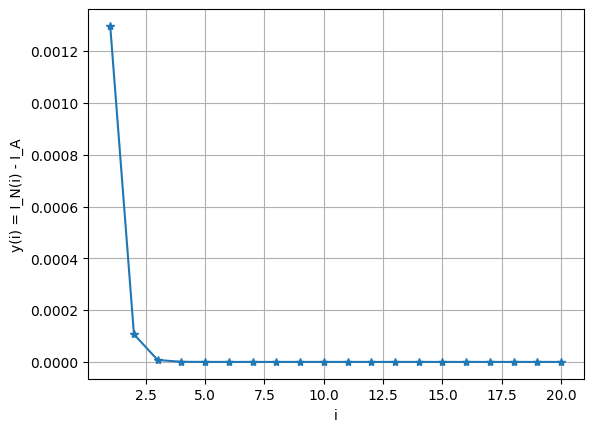

In [63]:


import math
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n=50):
    h = (b - a) / (2 * n)
    s = f(a) + f(b)
    # liché indexy: 1,3,...,2n-1  -> váha 4; tj. body a+(2k-1)h
    s += 4 * sum(f(a + (2*k - 1)*h) for k in range(1, n+1))
    # sudé indexy: 2,4,...,2n-2 -> váha 2; tj. body a+2kh, k=1..n-1
    s += 2 * sum(f(a + 2*k*h) for k in range(1, n))
    return s * h / 3



def simpson_for_i()->list:
    f = lambda x: 1/x
    
    vysledky = list()
    for i in range(1,21):
        n = 2**(i-1)


        vysledek = simpson_rule(f, 1, 2, n)
        vysledky.append(vysledek)

    return vysledky


vysledky = simpson_for_i()

print(vysledky)



IA = math.log(2)             # zadal jsem vysledek finální interpolace do googlu a vyjelo na mě, že jeho funckeční hodnota je ln(2)
print(IA)

print(vysledky[-1])


#IA = analytická hodnota integrálu
#IN = numerická hodnota integrálu



i_vals = list(range(1, 21))
y_vals = [IN - IA for IN in vysledky]

print(y_vals)
print(i_vals)

plt.plot(i_vals, y_vals, "*-")
plt.xlabel("i")
plt.ylabel("y(i) = I_N(i) - I_A")
plt.grid(True)
plt.show()
